# Seoul bike sharing demand prediction

### Importing Packeges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Loading Data

In [2]:
data_path=r"C:\Users\adrij\OneDrive\Desktop\ML_Seoul\Data\SeoulBikeData.csv"
df=pd.read_csv(data_path,encoding="unicode_escape")

In [3]:
df.shape


(8760, 14)

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
#.T is for transpose
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Checking null values in each column - missing values

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Weekday']=df['Date'].dt.day_name()
df.drop("Date",axis=1,inplace=True)
#inplace=True means you don't need to assign it to a data frame

C:\Users\adrij\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\adrij\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\adrij\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\adrij\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specif

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [10]:
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0              0.0            0.0  Winter  No Holiday             Yes   12   
1              0.0            0.0  Winter  No Holiday             Yes   12   
2              0.0            0.0  Winter  No Holiday             Yes   12   
3              0.0            0.0  Winter  No Holiday             Yes   12   
4              0.0            0.0  Winter  No Holiday             Yes   12   
...            ...            ...     ...         ...             ...  ...   
8755           0.0            0.0  Autumn  No Holiday             Yes   30   
8756           0.0            0.0  Autumn  No Holiday             Yes   30   
8757           0.0            0.0  Autumn  No Holiday             Yes   30   
8758           0.0            0.0  Autumn  No Holiday             Yes   30   
8759           0.0            0.0  Autumn  No Holiday             Yes   30   

      Month  Year   Weekday  
0         1  2017  Thursday  
1         1  2017  Thursday  
2         1  2017  Thursday  
3         1  2017  Thursday  
4         1  2017  Thursday  
...     ...   ...       ...  
8755     11  2018    Friday  
8756     11  2018    Friday  
8757     11  2018    Friday  
8758     11  2018    Friday  
8759     11  2018    Friday  

[8760 rows x 17 columns]

## EDA

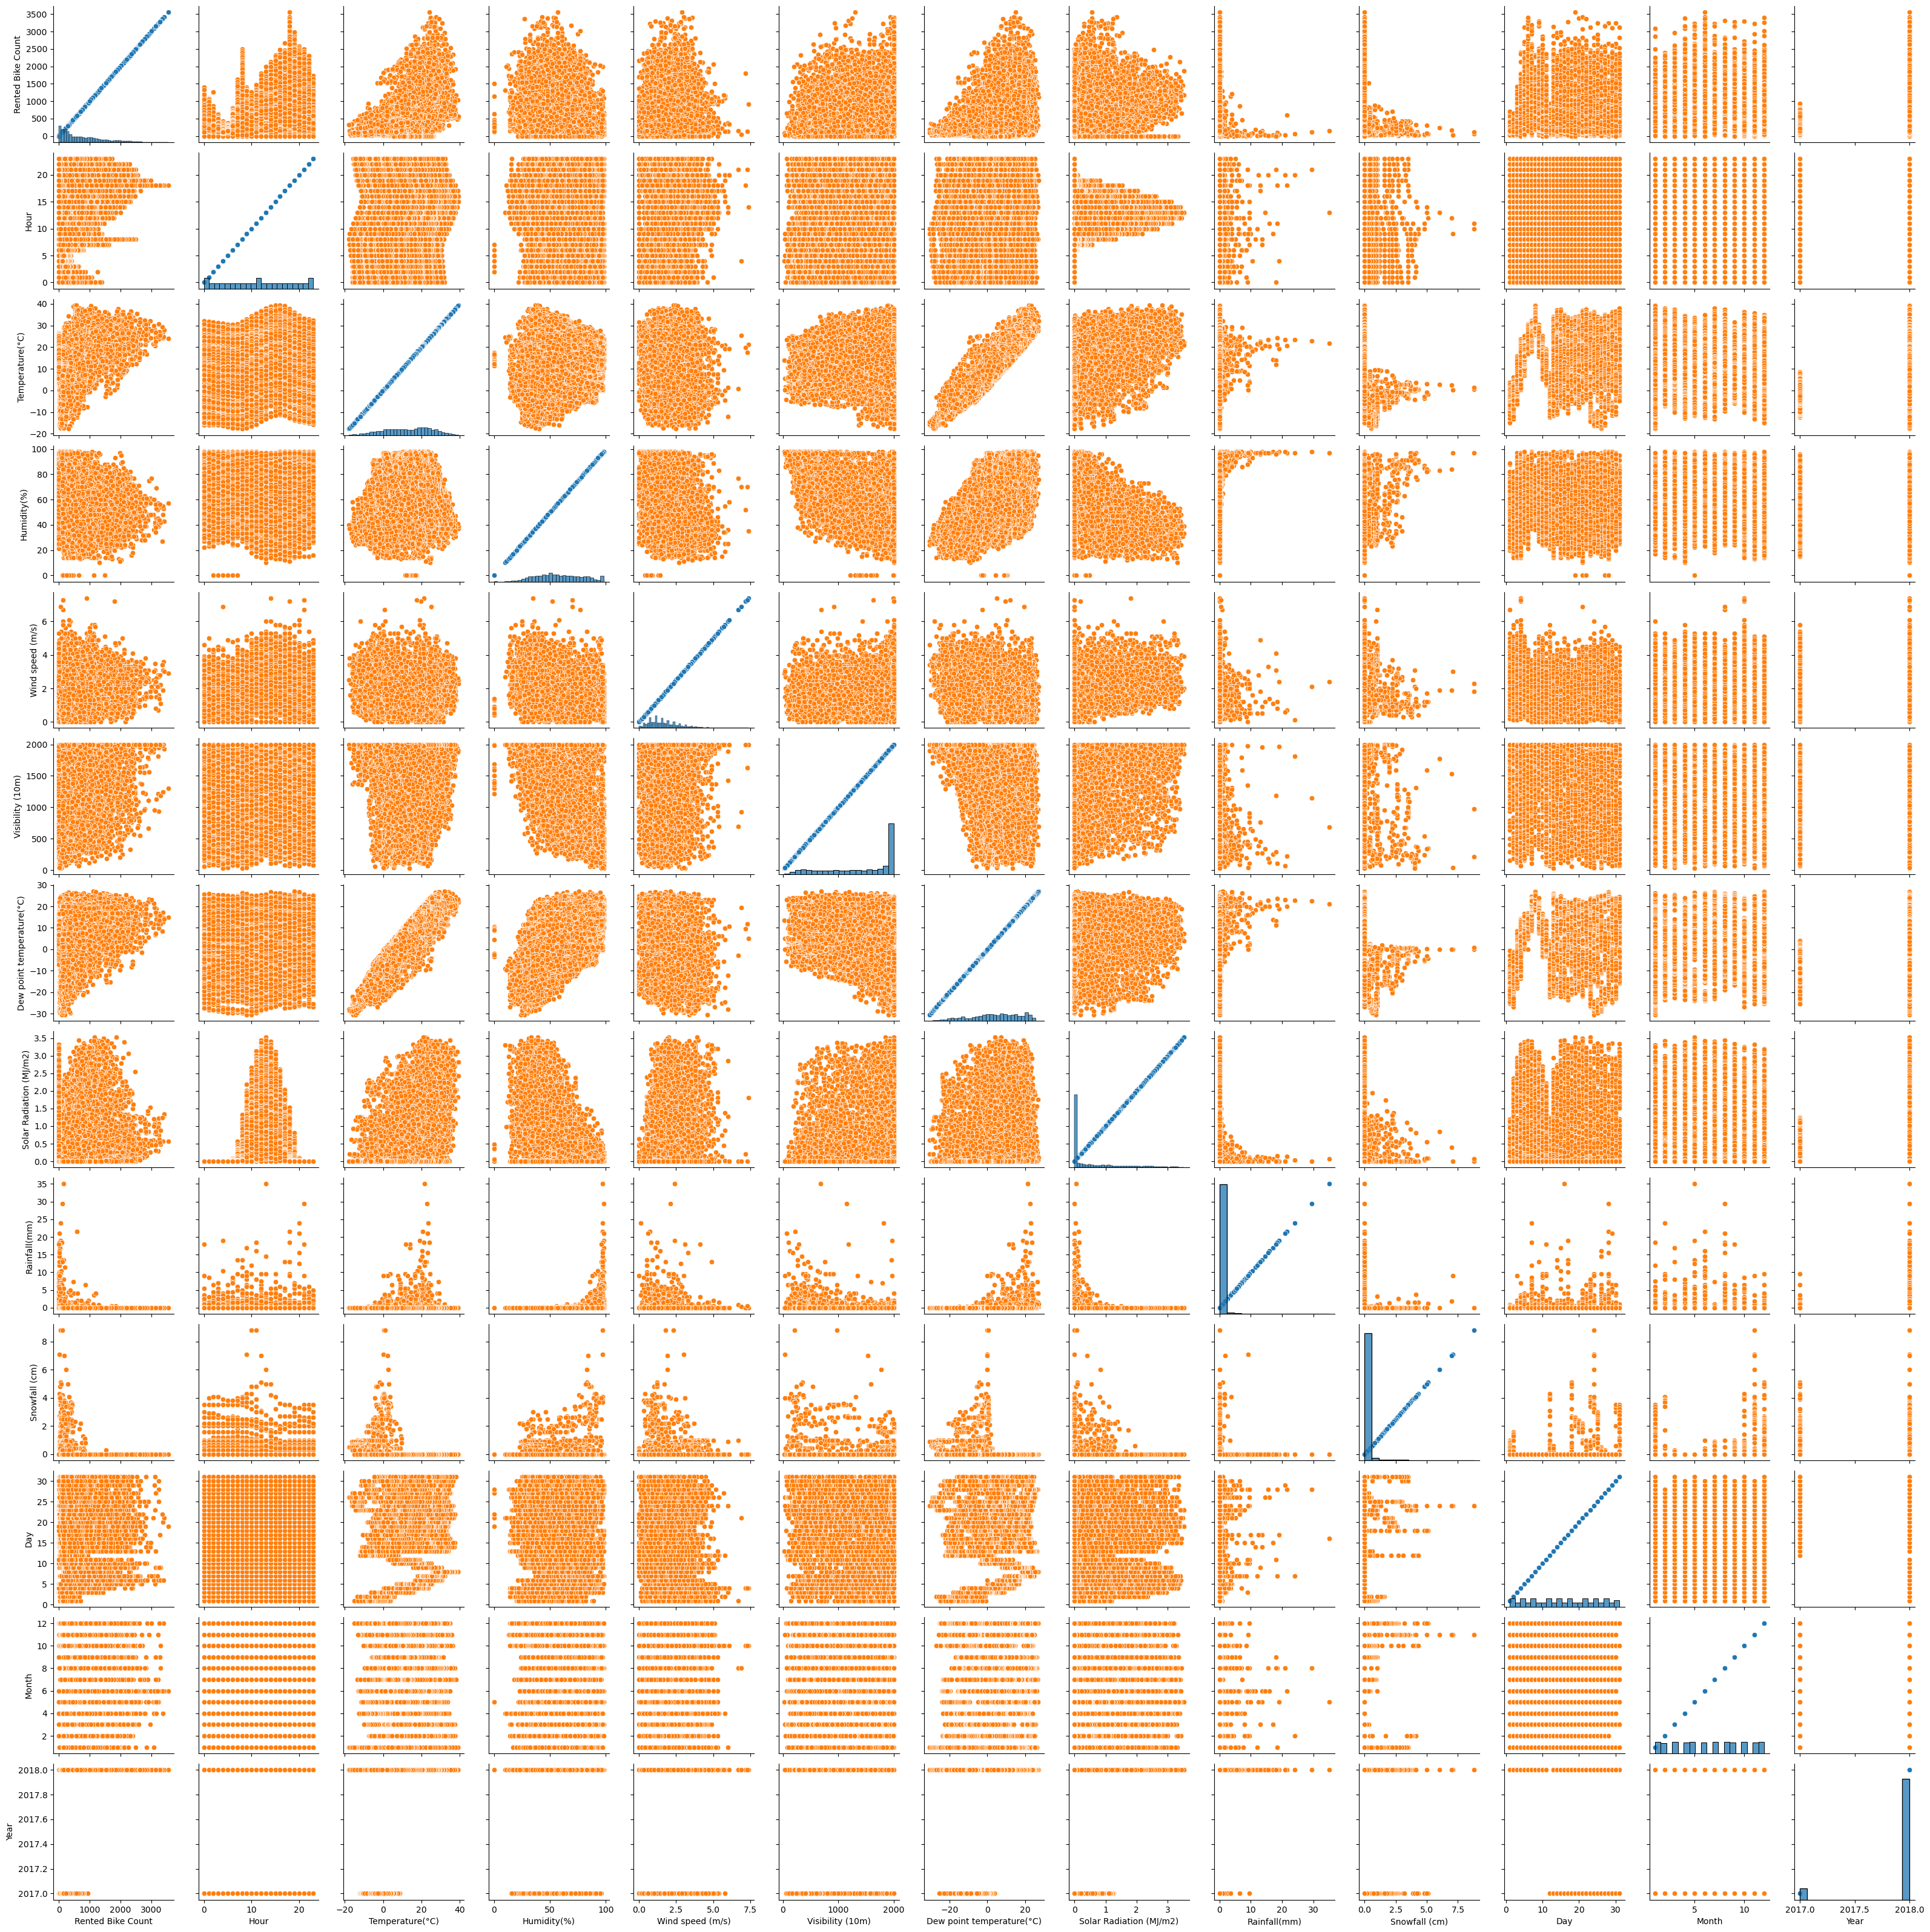

In [11]:
pairgrid=sns.pairplot(df) 
##each and every numerical data ka scatterplot and histogram milega
##all data by all data
pairgrid.map(sns.scatterplot)
plt.show()


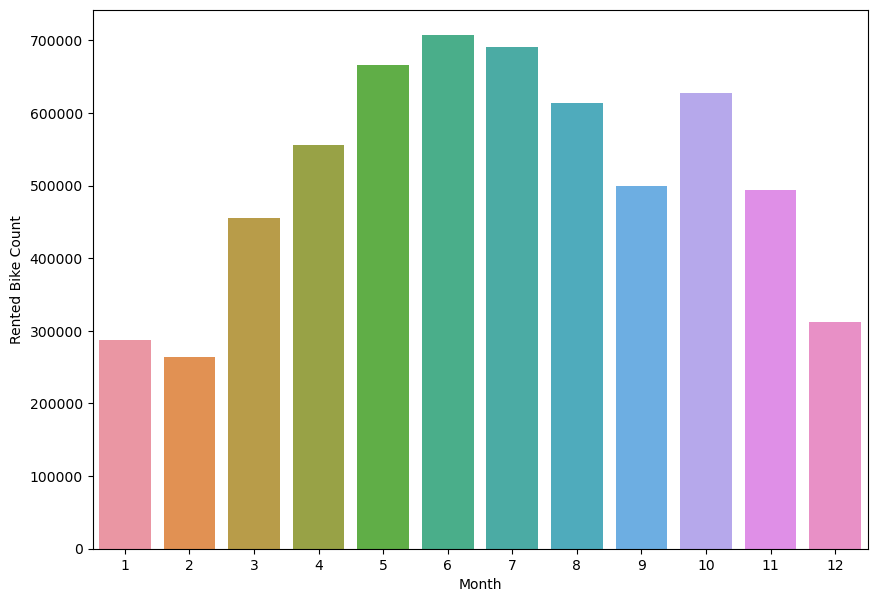

In [12]:
plt.figure(figsize=(10,7))
Month=df.groupby("Month").sum().reset_index()
sns.barplot(x='Month',y='Rented Bike Count',data=Month)
plt.show()

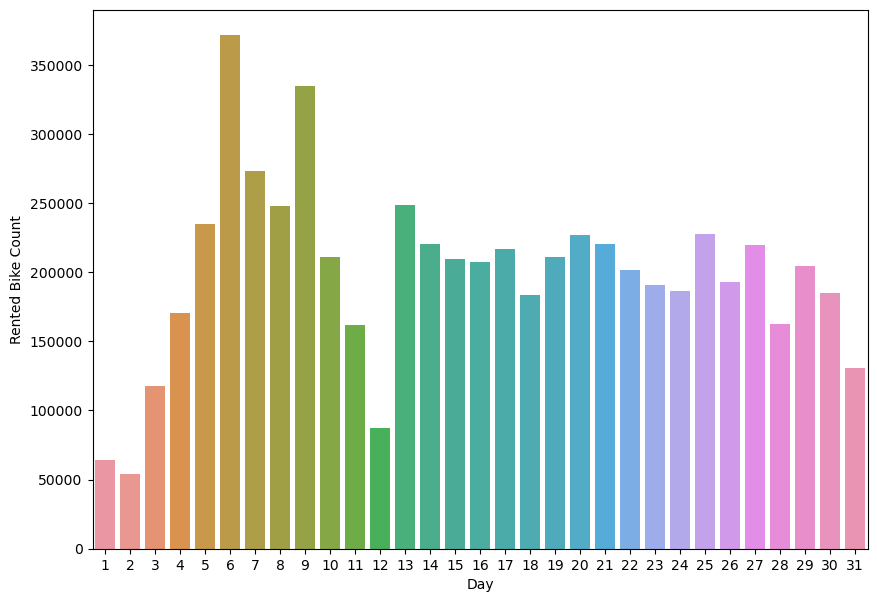

In [13]:
plt.figure(figsize=(10,7))
Day=df.groupby("Day").sum().reset_index()
sns.barplot(x='Day',y='Rented Bike Count',data=Day)
plt.show()

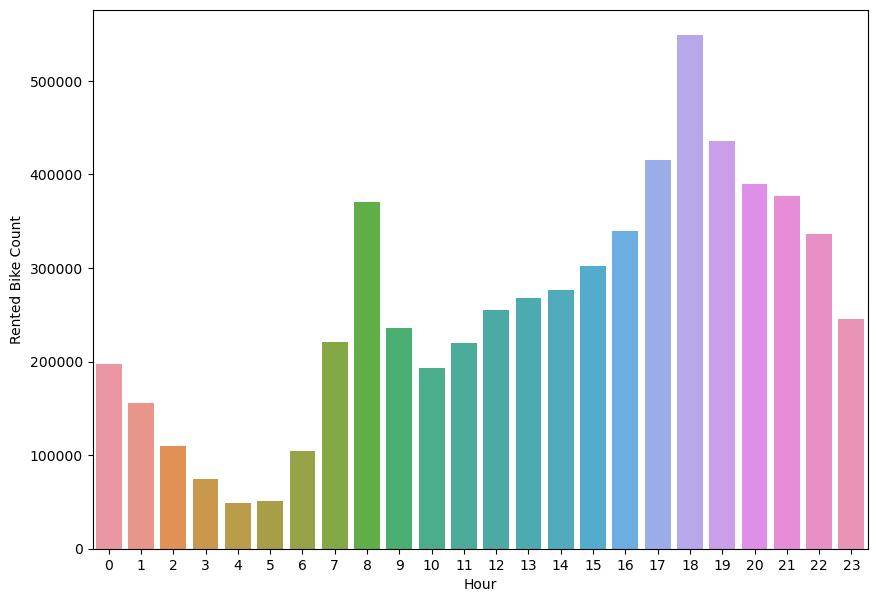

In [14]:
plt.figure(figsize=(10,7))
Hour=df.groupby("Hour").sum().reset_index()
sns.barplot(x='Hour',y='Rented Bike Count',data=Hour)
plt.show()

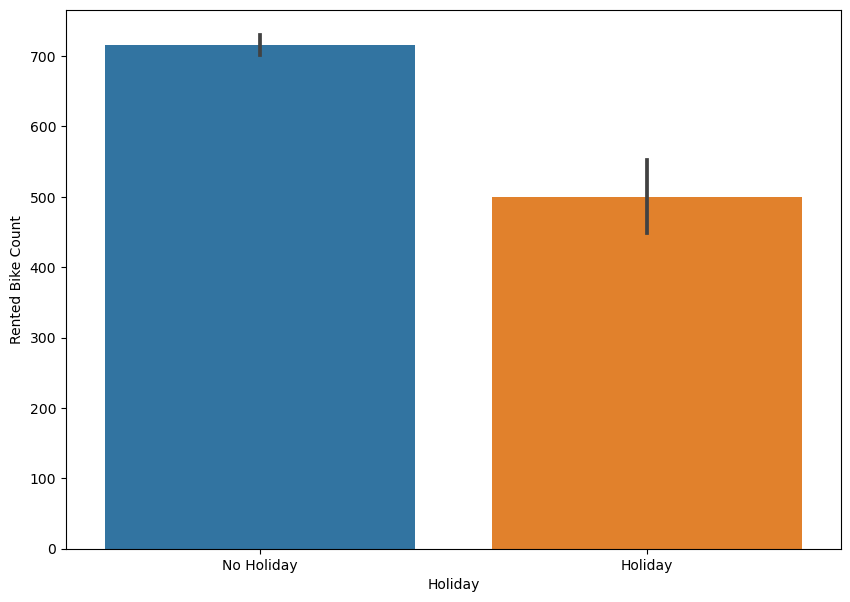

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x='Holiday',y='Rented Bike Count',data=df)
plt.show()

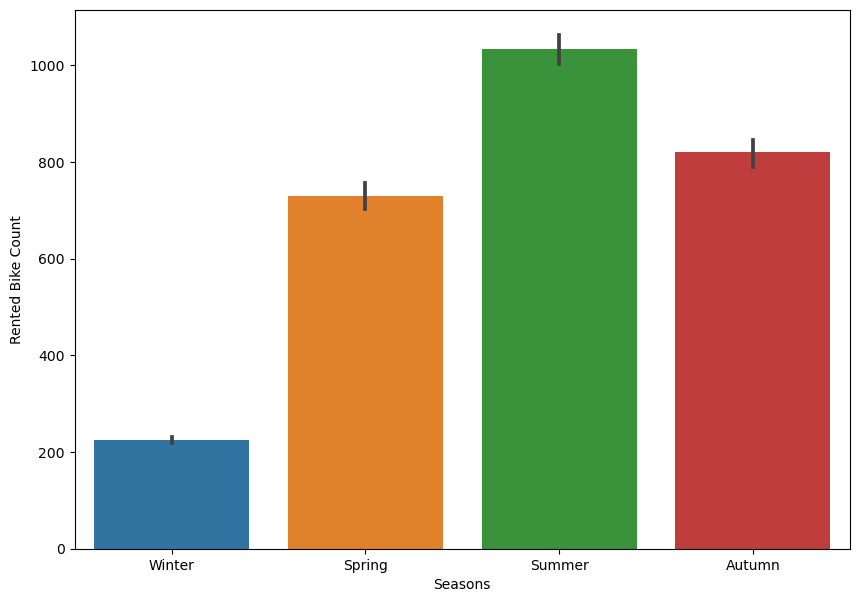

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)
plt.show()

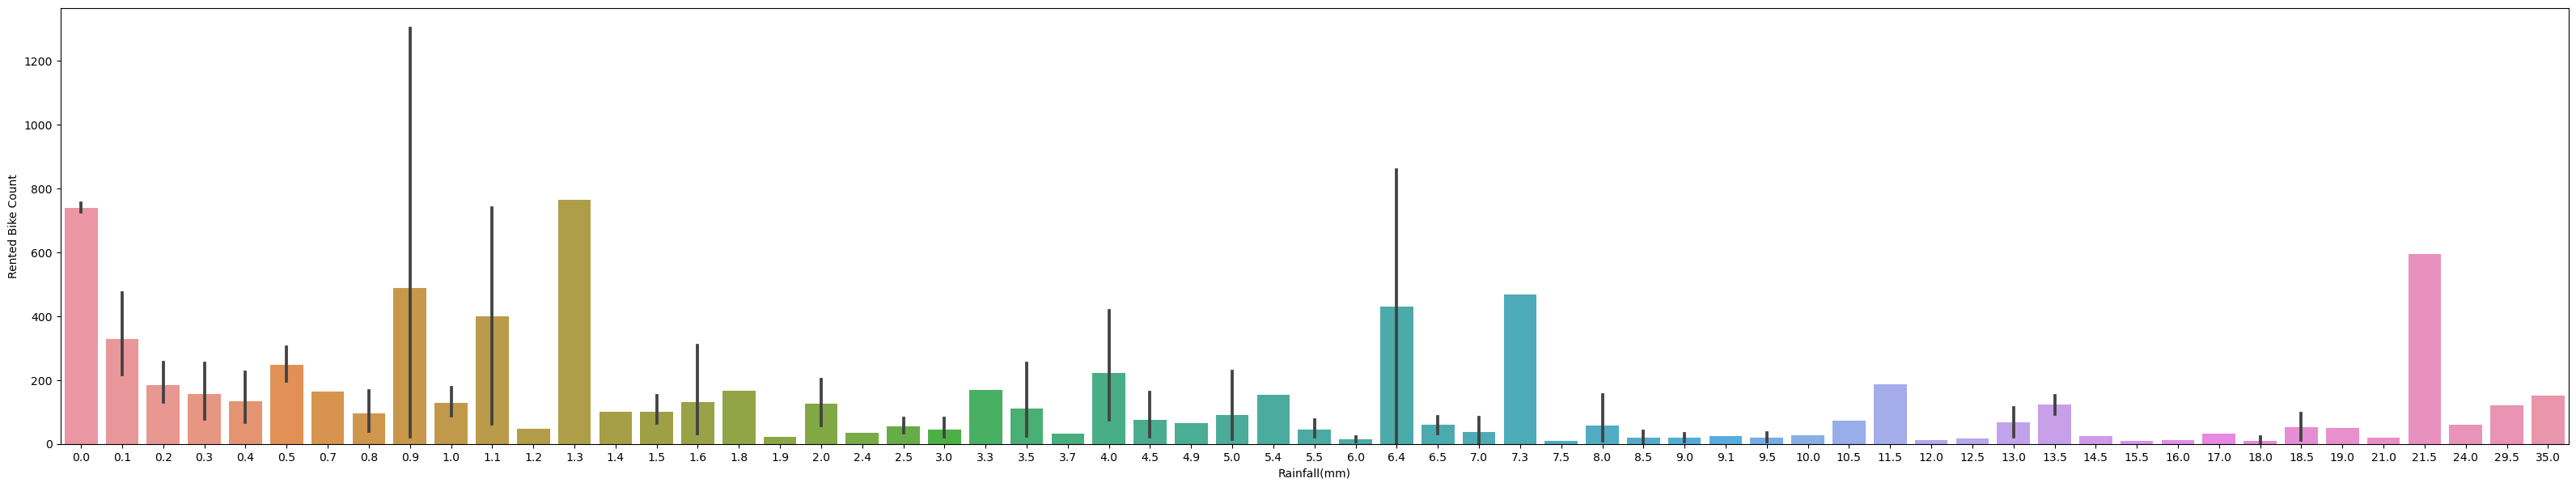

In [17]:
plt.figure(figsize=(40,7))
sns.barplot(x='Rainfall(mm)',y='Rented Bike Count',data=df)
plt.show()

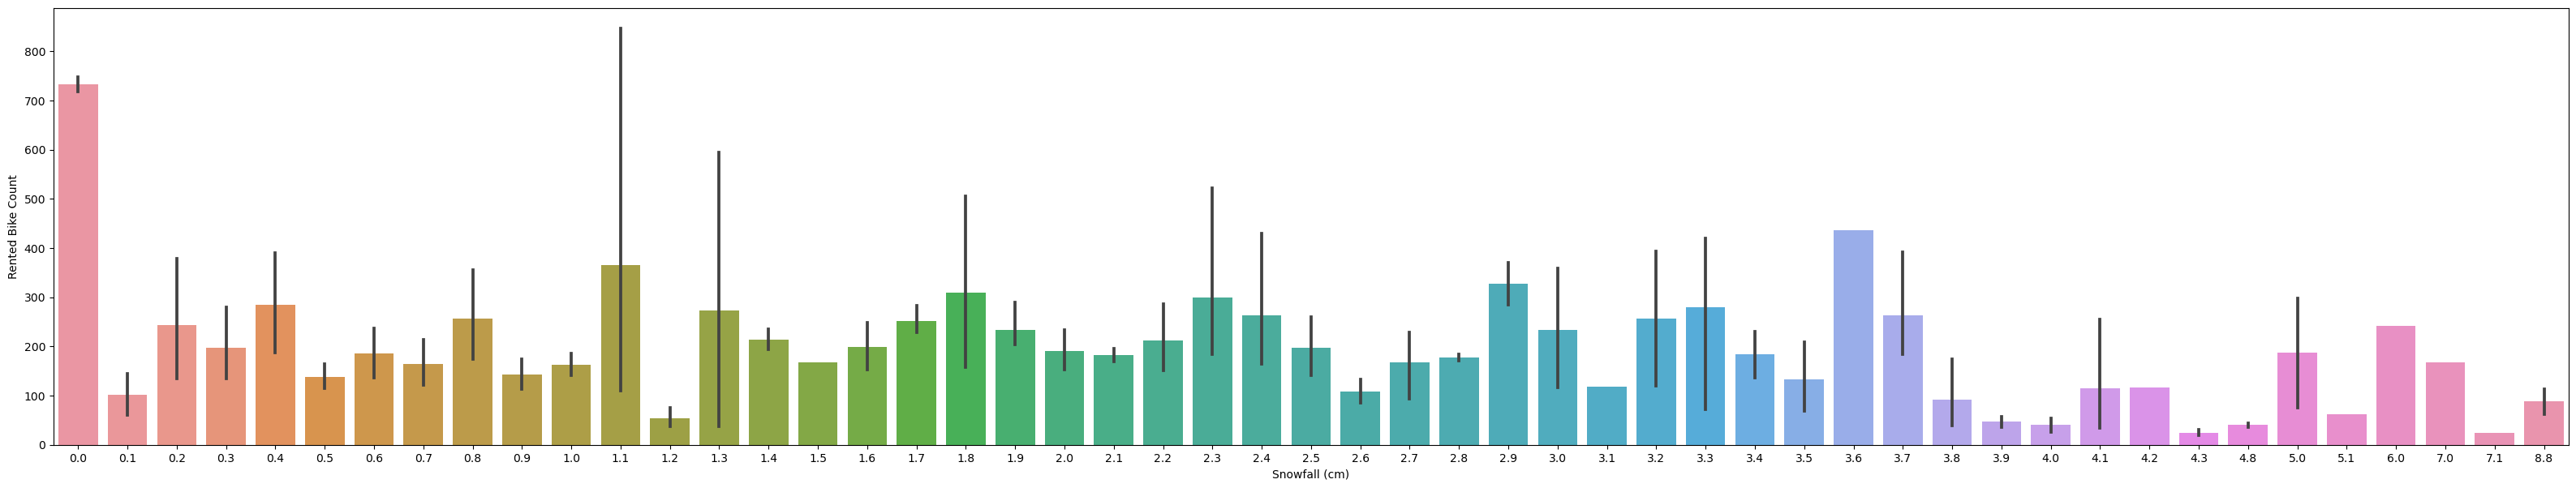

In [18]:
plt.figure(figsize=(40,7))
sns.barplot(x='Snowfall (cm)',y='Rented Bike Count',data=df)
plt.show()

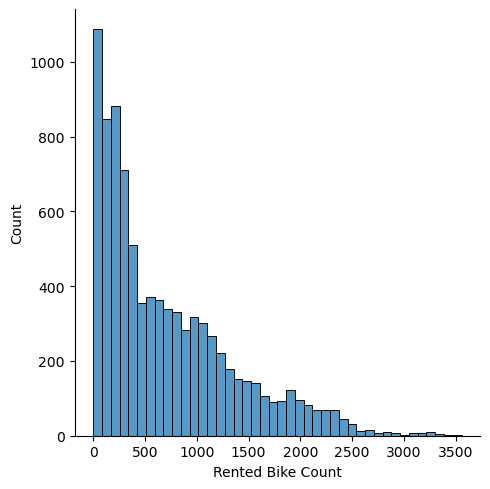

In [19]:
sns.displot(df["Rented Bike Count"])
plt.show()
##right skewed data

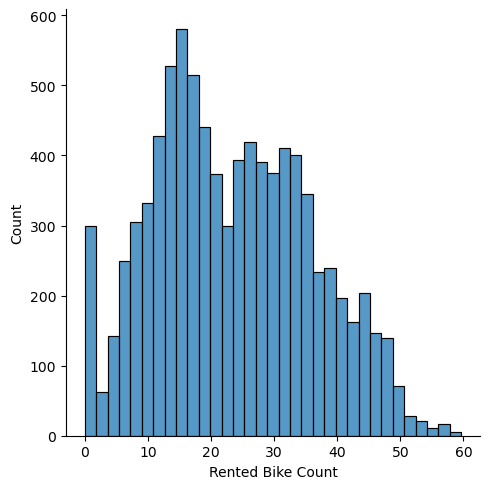

In [20]:
sns.displot(np.sqrt(df["Rented Bike Count"]))
plt.show()

## Skewed Data

In [21]:
df.skew().sort_values(ascending=True)
## 0 normal distribution
## -ve left skewed
## +ve right skewed
## we normalise and do feature engineering according to th ML model behaviour
## we won't remove the outliers until we know that ML model is giving us bad results because we are also not sure of the outliers
## if removing them gives us higher accuracy then we remove the outliers

C:\Users\adrij\AppData\Local\Temp\ipykernel_1452\659344955.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=True)


Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## Remove Multicollinearity

In [22]:
df.corr()
#Pearson correlation: positive/negative

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Day                                 0.046849  4.206322e-16         0.080908   
Month                               0.070861  1.036729e-15         0.049683   
Year                                0.215162  2.336763e-14         0.377796   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
Day                           0.007047         -0.061234         -0.106859   
Month                         0.047798         -0.082069          0.077888   
Year                          0.035925         -0.003781          0.052381   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
Day                                         0.069708                -0.003446   
Month                                       0.065101                -0.030412   
Year                                        0.336350                 0.128086   

                           Rainfall(mm)  Snowfall (cm)           Day  \
Rented Bike Count             -0.123074      -0.141804  4.684885e-02   
Hour                           0.008715      -0.021516  4.206322e-16   
Temperature(°C)                0.050282      -0.218405  8.090791e-02   
Humidity(%)                    0.236397       0.108183  7.047359e-03   
Wind speed (m/s)              -0.019674      -0.003554 -6.123440e-02   
Visibility (10m)              -0.167629      -0.121695 -1.068595e-01   
Dew point temperature(°C)      0.125597      -0.150887  6.970777e-02   
Solar Radiation (MJ/m2)       -0.074290      -0.072301 -3.445555e-03   
Rainfall(mm)                   1.000000     

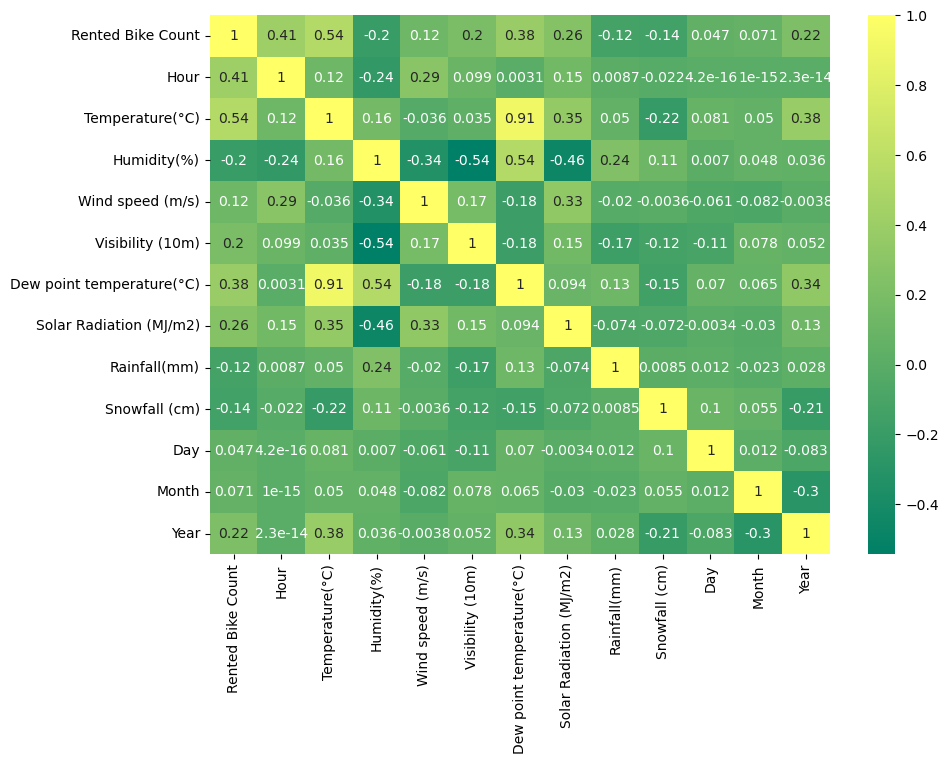

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='summer')
plt.show()

In [24]:
#we an remove the corelation close to 0
# dew point temperature is very strongly corelated to temperature so we can drop any one of them
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
def get_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    
    return vif


In [26]:
not_for_vif=['Day','Month','Year','Rented Bike Count']
df[[i for i in df.describe().columns if i not in not_for_vif]]

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0             -5.2           37               2.2              2000   
1        1             -5.5           38               0.8              2000   
2        2             -6.0           39               1.0              2000   
3        3             -6.2           40               0.9              2000   
4        4             -6.0           36               2.3              2000   
...    ...              ...          ...               ...               ...   
8755    19              4.2           34               2.6              1894   
8756    20              3.4           37               2.3              2000   
8757    21              2.6           39               0.3              1968   
8758    22              2.1           41               1.0              1859   
8759    23              1.9           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
8755            0.0  
8756            0.0  
8757            0.0  
8758            0.0  
8759            0.0  

[8760 rows x 9 columns]

In [27]:
not_for_vif=['Day','Month','Year','Rented Bike Count']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [28]:
not_for_vif=['Day','Month','Year','Rented Bike Count','Dew point temperature(°C)']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])
# vif of temperature decreases if we remove dew point temperature we wanted to remove one out of dewpoint
# and temperature but we removed dewpoint as temperature was more related to our rented bike output

variables       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

In [29]:
not_for_vif=['Day','Month','Year','Rented Bike Count','Temperature(°C)']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables       VIF
0                       Hour  3.847933
1                Humidity(%)  5.262460
2           Wind speed (m/s)  4.729187
3           Visibility (10m)  4.964387
4  Dew point temperature(°C)  1.656085
5    Solar Radiation (MJ/m2)  1.914776
6               Rainfall(mm)  1.079939
7              Snowfall (cm)  1.111339

In [30]:
df.drop('Dew point temperature(°C)',axis=1,inplace=True)
#we are keeping the day and year feature in the future we'll need because we are doing for prediction only so 
#though there is minimun corelation we still donot drop it.

## Encoding Categorical variable into numerical data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day                      8760 non-null   int64  
 13  Month                    8760 non-null   int64  
 14  Year                    

In [32]:
cat_features=['Seasons','Holiday','Functioning Day','Weekday']

In [33]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [34]:
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [35]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [36]:
df['Functioning Day']=df['Functioning Day'].map({'No':0,'Yes':1})

In [37]:
df['Seasons'].value_counts()
# we cannot numeriacally assign 1 2 3 4 as it might give greater priority to 4 so we'll use one hot encoding and make 
# seperate columns for all of them
# same goes for week days as we want to give all equal priorities

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [38]:
df['Weekday'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Weekday, dtype: int64

In [39]:
df_season=pd.get_dummies(df['Seasons'],drop_first = True) 
# we are dropping first as though first is dropped still 0 0 0 signifies there is a fourth column
df_weekday=pd.get_dummies(df['Weekday'],drop_first = True) 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  Month                    8760 non-null   int64  
 14  Year                    

In [41]:
df=pd.concat([df,df_season,df_weekday],axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  Month                    8760 non-null   int64  
 14  Year                    

In [43]:
df.drop(["Seasons","Weekday"],axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [45]:
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

      Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0           0  ...  2017       0       0       1       0         0       0   
1           0  ...  2017       0       0       1       0         0       0   
2           0  ...  2017       0       0       1       0         0       0   
3           0  ...  2017       0       0       1       0         0       0   
4           0  ...  2017       0       0       1       0         0       0   
...       ...  ...   ...     ...     ...     ...     ...       ...     ...   
8755        0  ...  2018       0       0       0       0         0       0   
8756        0  ...  2018       0       0       0       0         0       0   
8757        0  ...  2018       0       0       0       0         0       0   
8758        0  ...  2018       0       0       0       0         0       0   
8759        0  ...  2018       0       0       0       0         0       0   

      Thursday  Tuesday  Wednesday  
0            1        0          0  
1            1        0          0  
2            1        0          0  
3            1        0          0  
4            1        0          0  
...        ...      ...        ...  
8755         0        0          0  
8756         0        0          0  
8757         0        0          0  
8758         0        0          0  
8759         0        0          0  

[8760 rows x 23 columns]

In [46]:
df.shape

(8760, 23)

## Split data for training and testing

In [47]:
X=df.drop("Rented Bike Count",axis=1)
y=df["Rented Bike Count"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=999)
print("Shape of X_Train: ",X_train.shape)
print("Shape of X_Tst: ",X_test.shape)
print("Shape of y_Train: ",y_train.shape)
print("Shape of y_Test: ",y_test.shape)

Shape of X_Train:  (7008, 22)
Shape of X_Tst:  (1752, 22)
Shape of y_Train:  (7008,)
Shape of y_Test:  (1752,)


## Scaling

In [48]:
# so that all colums are relative in values
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [49]:
X_train[:2]
#now data not in data frame but in numpy array
#for training ml model we need numpy aaray and not dataframe

array([[-0.5071934 ,  0.06483214, -0.06058598, -0.30999539,  0.92871813,
         0.83201187, -0.13674625, -0.16889778, -0.23031028,  0.18708879,
         0.37813779, -0.43842714,  0.30207422,  1.71767127, -0.58262298,
        -0.56856208, -0.39985101,  2.4669709 , -0.42238523, -0.40845216,
        -0.41414314, -0.40511677],
       [ 0.21384103, -1.20866052, -1.24259231,  2.01679613,  0.92871813,
         0.71616423, -0.13674625, -0.16889778,  4.34196859,  0.18708879,
         1.0599533 ,  1.59058057, -3.31044474, -0.58218357, -0.58262298,
         1.75882289,  2.5009315 , -0.40535541, -0.42238523, -0.40845216,
        -0.41414314, -0.40511677]])

## ML Models

In [50]:
# first we need t identify our problem which is regression problem
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [51]:
def get_metrics(y_test,y_pred,modelname):
    MSE=mean_squared_error(y_test,y_pred)
    RMSE=np.sqrt(MSE)
    MAE=mean_absolute_error(y_test,y_pred)
    R2=r2_score(y_test,y_pred)
    
    print(f"{modelname}: ['MSE':{MSE},'RMSE':{RMSE},'MAE':{MAE},'R2':{R2}]")

In [52]:
!pip install xgboost

In [53]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [54]:
y_pred_lr

array([ -38.40567782,  877.10262692,  741.14627568, ...,  826.12858283,
        389.64230248, 1515.00428097])

In [55]:
rir=Ridge()
rir.fit(X_train,y_train)
y_pred_rir=rir.predict(X_test)

In [56]:
las=Lasso()
las.fit(X_train,y_train)
y_pred_las=rir.predict(X_test)

In [57]:
poly=PolynomialFeatures(2)
X_Train_Poly=poly.fit_transform(X_train)
X_Test_Poly=poly.fit_transform(X_test)
poly_r=LinearRegression().fit(X_Train_Poly,y_train)
y_pred_poly=poly_r.predict(X_Test_Poly)

In [58]:
svr=SVR().fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)

In [59]:
knnr=KNeighborsRegressor().fit(X_train,y_train)
y_pred_knnr=knnr.predict(X_test)

In [60]:
dtr=DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr=dtr.predict(X_test)

In [61]:
rfr=RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

In [62]:
xgb=XGBRegressor().fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

In [63]:
get_metrics(y_test,y_pred_lr,"Linear Regression")
get_metrics(y_test,y_pred_rir,"Ridge Regression")
get_metrics(y_test,y_pred_las,"Lasso Regression")
get_metrics(y_test,y_pred_poly,"Polynomial Regression")
get_metrics(y_test,y_pred_svr,"SVR Regression")
get_metrics(y_test,y_pred_knnr,"KNeighbors Regression")
get_metrics(y_test,y_pred_dtr,"DecisionTree Regression")
get_metrics(y_test,y_pred_rfr,"RandomForest Regression")
get_metrics(y_test,y_pred_xgb,"XGB Regression")

Linear Regression: ['MSE':178455.25964713798,'RMSE':422.4396520772381,'MAE':317.39142628124654,'R2':0.5503819148464212]
Ridge Regression: ['MSE':178453.12159448536,'RMSE':422.4371214683735,'MAE':317.38513522522163,'R2':0.55038730167078]
Lasso Regression: ['MSE':178453.12159448536,'RMSE':422.4371214683735,'MAE':317.38513522522163,'R2':0.55038730167078]
Polynomial Regression: ['MSE':126101.82068966389,'RMSE':355.10818167097176,'MAE':239.99991917719035,'R2':0.6822864214538944]
SVR Regression: ['MSE':306847.01124726114,'RMSE':553.9377322833868,'MAE':383.54569361410364,'R2':0.22689885462109516]
KNeighbors Regression: ['MSE':109241.57776255706,'RMSE':330.5171368666942,'MAE':212.57511415525113,'R2':0.7247658090331639]
DecisionTree Regression: ['MSE':73441.5450913242,'RMSE':271.00100570168405,'MAE':153.87385844748857,'R2':0.8149640030785668]
RandomForest Regression: ['MSE':38397.12758835616,'RMSE':195.95185017844602,'MAE':116.40594748858447,'R2':0.9032584244599415]
XGB Regression: ['MSE':33384

## Visualise model prediction

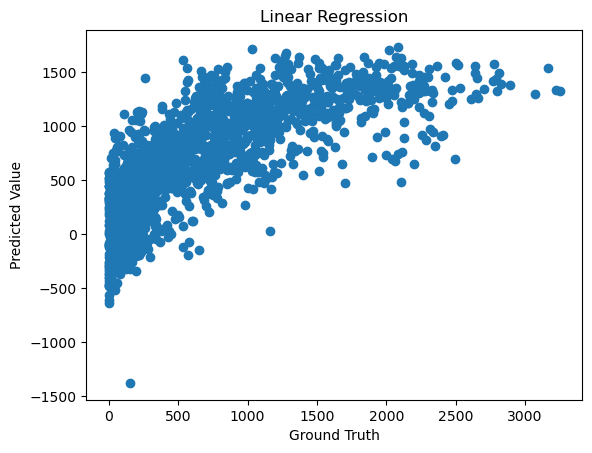

In [64]:
plt.scatter(y_test,y_pred_lr)
plt.title("Linear Regression")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Value")
plt.show()

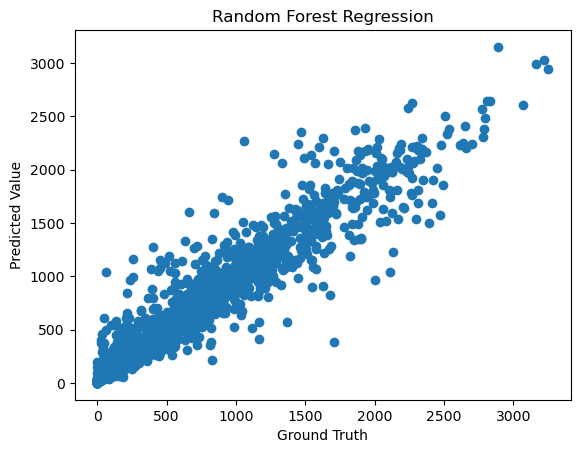

In [65]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Regression")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Value")
plt.show()

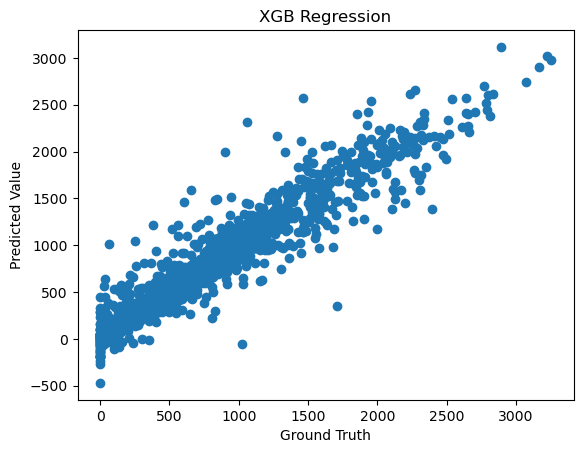

In [66]:
plt.scatter(y_test,y_pred_xgb)
plt.title("XGB Regression")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Value")
plt.show()

## Hyperparametertuning for Random Forest Regressor

In [68]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels allowed in each decision tree
max_depth=[int(x) for x in np.linspace(10,120,num=12)]

#Minimum number of samples required to split a node
min_samples_split=[2,5,10]

#Minimum number of samples required at each leaf node
min_samples_leaf= [1,2,4]

#Method of selecting samples for training each tree
bootstrap=[True,False]

#Create the random grid
random_grid= {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap,
             }


In [70]:
import time
start_time=time.time()
rf=RandomForestRegressor()
#Random Search of parameters using 3 fold cross validation
# Search across 100 different combinations and take the all available cores
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
#fit the random search model
rf_random.fit(X_train,y_train)
y_pred_rf_random= rf_random.predict(X_test)
print("Time taken for randomised search: ",time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Time taken for randomised search:  680.9881057739258


In [71]:
get_metrics(y_test,y_pred_rf_random,"RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning: ['MSE':36023.48989004674,'RMSE':189.7985508112397,'MAE':117.81695990296804,'R2':0.9092388054185777]


In [72]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [75]:
rf_tuned= RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 120,
 bootstrap= False)
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned=rf_tuned.predict(X_test)

get_metrics(y_test,y_pred_rf_tuned,"Random Forest Regressor with best parameters")

Random Forest Regressor with best parameters: ['MSE':35926.53247394503,'RMSE':189.54295680384706,'MAE':117.87309184741248,'R2':0.9094830896602151]


## Hyperparameter tuning for XGBoost Regressor

In [106]:
from sklearn.model_selection import RandomizedSearchCV
import time
start_time=time.time()

params={'max_depth':[3,5,6,10,15,20],
       'learning_rate':[0.01,0.1,0.2,0.3],
       'subsample':np.arange(0.5,1.0,0.1),
       'colsample_bytree':np.arange(0.4,1.0,0.1),
       'colsample_bylevel':np.arange(0.4,1.0,0.1),
       'n_estimators':[100,500,1000]}

xgbr=XGBRegressor(seed=20)
rscv=RandomizedSearchCV(estimator=xgbr,param_distributions=params,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=1)
rscv.fit(X_train,y_train)
y_pred_xgb_random=rscv.predict(X_test)
get_metrics(y_test,y_pred_xgb_random,"XGB Regressor with best parameters")
print("time taken: ",time.time()-start_time)
print("Best parameters: ",rscv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGB Regressor with best parameters: ['MSE':25153.585169009126,'RMSE':158.5988183089935,'MAE':92.1676233781323,'R2':0.9366255339248628]
time taken:  629.829558134079
Best parameters:  {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7}


In [79]:
xgbr=XGBRegressor(subsample= 0.5, n_estimators= 1000, max_depth= 10, learning_rate= 0.01, colsample_bytree= 0.8999999999999999, colsample_bylevel= 0.7)
xgbr.fit(X_train,y_train)
y_pred_tuned=xgbr.predict(X_test)
get_metrics(y_test,y_pred_tuned,"XGB Regressor with best parameters")

XGB Regressor with best parameters: ['MSE':25621.877460149248,'RMSE':160.0683524627815,'MAE':93.95230415349478,'R2':0.9354456713438948]


In [90]:
#accuracy score in only used in classification models and not regression models


## Saving the model

In [94]:
import pickle
import os

dir=r"C:\Users\adrij\OneDrive\Desktop\ML_Seoul\Model"
model_file_name = "XGB_Regressor_r2_0_935_v1.pkl"
model_file_path=os.path.join(dir,model_file_name)
pickle.dump(xgbr,open(model_file_path,"wb"))


In [95]:
X_test

array([[-1.22822782, -1.83702861, -0.89784047, ..., -0.40845216,
        -0.41414314, -0.40511677],
       [-0.36298651,  0.65968727, -0.35608756, ..., -0.40845216,
         2.41462406, -0.40511677],
       [-1.08402094,  0.97806043,  1.36767168, ..., -0.40845216,
        -0.41414314,  2.46842407],
       ...,
       [-0.07457274, -0.42948409, -0.99634099, ..., -0.40845216,
        -0.41414314, -0.40511677],
       [-1.08402094, -0.9405568 , -0.35608756, ..., -0.40845216,
        -0.41414314, -0.40511677],
       [ 1.511703  ,  1.50588963,  0.23491561, ..., -0.40845216,
         2.41462406, -0.40511677]])

In [99]:
X_test[0:3,:]

array([[-1.22822782, -1.83702861, -0.89784047,  1.3381486 ,  0.92871813,
        -0.65083793, -0.13674625, -0.16889778, -0.23031028,  0.18708879,
         0.15086595,  1.59058057, -3.31044474, -0.58218357, -0.58262298,
         1.75882289, -0.39985101, -0.40535541,  2.36750703, -0.40845216,
        -0.41414314, -0.40511677],
       [-0.36298651,  0.65968727, -0.35608756, -0.21304574,  0.88418981,
         1.26064814, -0.13674625, -0.16889778, -0.23031028,  0.18708879,
        -0.98549323,  0.43114759,  0.30207422, -0.58218357,  1.71637582,
        -0.56856208, -0.39985101, -0.40535541, -0.42238523, -0.40845216,
         2.41462406, -0.40511677],
       [-1.08402094,  0.97806043,  1.36767168,  2.21069542,  0.87594383,
        -0.65083793, -0.13674625, -0.16889778, -0.23031028,  0.18708879,
         1.51449697,  0.43114759,  0.30207422, -0.58218357,  1.71637582,
        -0.56856208, -0.39985101, -0.40535541, -0.42238523, -0.40845216,
        -0.41414314,  2.46842407]])

In [104]:
y_test

387      100
5265     787
6508     128
1601     225
1693     268
        ... 
3763    1639
7318    1501
8435     830
3076      90
6166    1587
Name: Rented Bike Count, Length: 1752, dtype: int64

In [102]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1752 entries, 387 to 6166
Series name: Rented Bike Count
Non-Null Count  Dtype
--------------  -----
1752 non-null   int64
dtypes: int64(1)
memory usage: 27.4 KB


## Dumpscaling parameters

In [107]:
sc


StandardScaler()

In [108]:
sc.mean_

array([1.15171233e+01, 1.29261844e+01, 5.82301655e+01, 1.71974886e+00,
       1.43686644e+03, 5.61805080e-01, 1.53296233e-01, 7.08333333e-02,
       5.03710046e-02, 9.66181507e-01, 1.56723744e+01, 6.51255708e+00,
       2.01791638e+03, 2.53139269e-01, 2.53424658e-01, 2.44292237e-01,
       1.37842466e-01, 1.41124429e-01, 1.51398402e-01, 1.42979452e-01,
       1.46404110e-01, 1.40981735e-01])